In [1]:
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("ogait/thesis_gravity_spy")
summary_list = [] 
config_list = [] 
name_list = [] 
for run in runs: 
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # # run.config is the input metrics.
    # # We remove special values that start with _.
    config = {k:v for k,v in run.config.items() if k in ('architecture', 'view', 'mixed_precision')}
    config_list.append(config) 

    # run.name is the name of the run.
    name_list.append(run.name)       

import pandas as pd 
summary_df = pd.DataFrame.from_records(summary_list) 
config_df = pd.DataFrame.from_records(config_list) 
name_df = pd.DataFrame({'name': name_list}) 
all_df = pd.concat([name_df, config_df,summary_df], axis=1)

In [2]:
all_df = all_df[:20]

In [3]:
all_df

,name,view,architecture,mixed_precision,best_f1,accuracy,image_size,train_samples_per_sec,lr_0,_step,...,sqr_mom_0,eps_0,valid_loss,raw_loss,_timestamp,train_loss,total_runtime,wd_0,mom_0,_runtime
0,jumping-sweep-20,encoded14,resnet34,False,0.966232,0.985248,"[140, 170]",873.547970,7.213657e-09,929,...,0.99,0.00001,0.063924,0.003332,1.660540e+09,0.005947,96.215767,0.01,0.949999,107.946535
1,fanciful-sweep-19,encoded124,resnet34,False,0.960791,0.983696,"[140, 170]",869.058048,7.213657e-09,929,...,0.99,0.00001,0.064487,0.002346,1.660540e+09,0.004278,98.601896,0.01,0.949999,110.733777
2,firm-sweep-18,encoded1234,resnet34,False,0.971646,0.988354,"[140, 170]",857.061290,2.388666e-09,929,...,0.99,0.00001,0.048470,0.001172,1.660540e+09,0.002273,105.809650,0.01,0.949999,118.195184
3,fearless-sweep-17,merged,resnet34,False,0.972317,0.987578,"[280, 340]",255.508882,3.452673e-09,929,...,0.99,0.00001,0.046523,0.001455,1.660539e+09,0.003342,276.874831,0.01,0.949999,306.099764
4,sparkling-sweep-16,single1,resnet34,False,0.937866,0.971273,"[140, 170]",874.583139,1.652553e-09,929,...,0.99,0.00001,0.119051,0.017916,1.660539e+09,0.003712,93.169263,0.01,0.949999,104.037556
5,expert-sweep-15,encoded14,resnet34,True,0.964744,0.983696,"[140, 170]",1333.581850,8.672723e-09,929,...,0.99,0.00001,0.072074,0.002358,1.660538e+09,0.006879,71.225357,0.01,0.949999,80.425187
6,swept-sweep-14,encoded124,resnet34,True,0.969610,0.984472,"[140, 170]",1360.476163,2.619120e-08,929,...,0.99,0.00001,0.062572,0.016018,1.660538e+09,0.011549,75.184191,0.01,0.949999,84.867241
7,golden-sweep-13,encoded1234,resnet34,True,0.965010,0.984472,"[140, 170]",1310.709775,1.507147e-08,929,...,0.99,0.00001,0.063262,0.008775,1.660538e+09,0.008825,97.108947,0.01,0.949999,110.656592
8,crimson-sweep-12,merged,resnet34,True,0.965351,0.986801,"[280, 340]",452.813911,4.151026e-09,929,...,0.99,0.00001,0.057040,0.003460,1.660538e+09,0.004848,185.115025,0.01,0.949999,205.362044
9,celestial-sweep-11,single1,resnet34,True,0.946108,0.975932,"[140, 170]",1367.883008,1.811989e-08,929,...,0.99,0.00001,0.092572,0.019282,1.660537e+09,0.041959,81.391254,0.01,0.949999,91.574866


In [ ]:
all_df.to_csv("logs/02_mixed_precision.csv")

In [2]:
import pandas as pd 
all_df = pd.read_csv('logs/02_mixed_precision.csv')

In [3]:
no_merged_df = all_df.loc[all_df['view'] != 'merged']

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

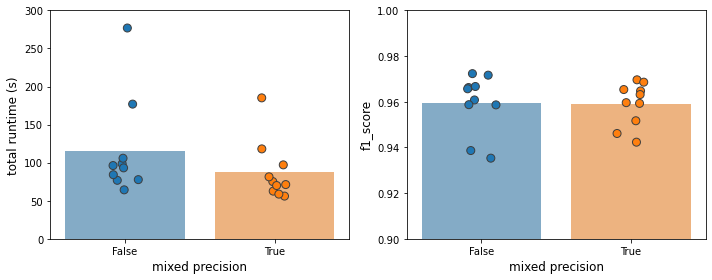

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.barplot(x='mixed_precision', y='total_runtime', data=all_df, errwidth=0, alpha=0.60)
sns.stripplot(x='mixed_precision', y='total_runtime',  data=all_df, linewidth=1, size=8)
plt.xlabel('mixed precision', size='large')
plt.ylabel('total runtime (s)', size='large')
plt.ylim([0, 300])
#plt.legend(frameon=False)

plt.subplot(1, 2, 2)
ax = sns.barplot(x='mixed_precision', y='f1_score', data=all_df, errwidth=0, alpha=0.6)
sns.stripplot(x='mixed_precision', y='f1_score', data=all_df, linewidth=1, size=8)
plt.ylabel('f1_score', size='large')
plt.xlabel('mixed precision', size='large')
plt.ylim([0.9, 1])

fig.tight_layout()
fig.savefig('../figs/glitches/02_mixed_precision.png', dpi=300)

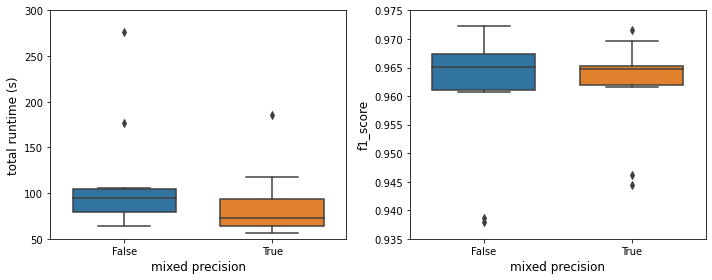

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.boxplot(x='mixed_precision', y='total_runtime', data=all_df, width=0.7)
plt.xlabel('mixed precision', size='large')
plt.ylabel('total runtime (s)', size='large')
plt.ylim([50, 300])

plt.subplot(1, 2, 2)
ax = sns.boxplot(x='mixed_precision', y='best_f1', data=all_df, width=0.7)
plt.ylabel('f1_score', size='large')
plt.xlabel('mixed precision', size='large')
plt.ylim([0.935, 0.975])

fig.tight_layout()
fig.savefig('../figs/glitches/02_mixed_precision_v2.png', dpi=300)

In [6]:
all_df.groupby('mixed_precision')[['total_runtime', 'f1_score']].describe()

total_runtime                                               \
                        count        mean        std        min        25%   
mixed_precision                                                              
False                    10.0  115.059737  64.625492  64.300427  79.331109   
True                     10.0   87.553208  39.088301  56.096825  64.471527   

                                                   f1_score            \
                       50%         75%         max    count      mean   
mixed_precision                                                         
False            94.692515  104.007712  276.874831     10.0  0.959466   
True             73.204774   93.179524  185.115025     10.0  0.959044   

                                                                             
                      std       min       25%       50%       75%       max  
mixed_precision                                                              
False            0.012782  0.935307  0.958658  0.963235  0.966572  0.972317  
True             0.009391  0.942309  0.953586  0.961384  0.965199  0.969610

In [7]:
(94.69-73.20)/73.2

0.2935792349726775

In [13]:
all_df.groupby('mixed_precision').mean()['total_runtime']

mixed_precision
False    115.059737
True      87.553208
Name: total_runtime, dtype: float64

In [11]:
(115.06-87.55)/115.06

0.23909264731444468

In [14]:
no_merged_df.groupby('mixed_precision').mean()['total_runtime']

mixed_precision
False    87.100972
True     71.540941
Name: total_runtime, dtype: float64

In [15]:
(87.10-71.54)/87.10

0.17864523536165314

In [ ]:
import numpy as np

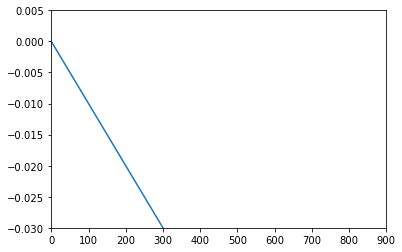

In [ ]:
x = np.linspace(0, 900, 100)
m = - 1/10000
b = 0
y = m * x + b
plt.xlim([0, 900])
plt.ylim([-0.03, 0.005])
plt.plot(x, y)

In [ ]:
m * 300 - m*360

0.006000000000000002

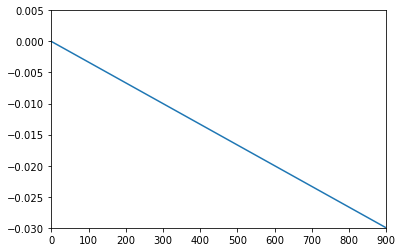

In [ ]:
x = np.linspace(0, 900, 100)
m = - 0.01 / 300
b = 0
y = m * x + b
plt.xlim([0, 900])
plt.ylim([-0.03, 0.005])
plt.plot(x, y)

In [ ]:
m * 300 - m*360

0.002